### problem - build a model able to learn from given data and predict the median housing price in any district.



**Framing the problem** : (asking questions) 

    1. understanding the business objective (so that client or company gets its benefit)
    
    2. ask what the current solution looks like ( if any) [helps as reference]
    
**Select a performance measure:** *Root Mean Square Error* (RMSE)[preferred] or *Mean Abs Error* (MAE)

**Check the assumptions:**
    
>**Pipelines :** A sequence of data processing components is called a data pipeline 

>**Signals :** A piece of info feed into ML system

>**Univariate regression :** that predicts only a single numeric value

>**Multivariate reg :** obvious; more than one val prediction

>**Batch learning :**  use when data is not changing rapidly and is small
>**Online learning :** use when data is huge

In [1]:
import pandas as pd

In [2]:
house_data = pd.read_csv("housing.csv")

In [3]:
house_data.shape

(20640, 10)

In [4]:
house_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
house_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


>25% of housing_median_age are less than 18

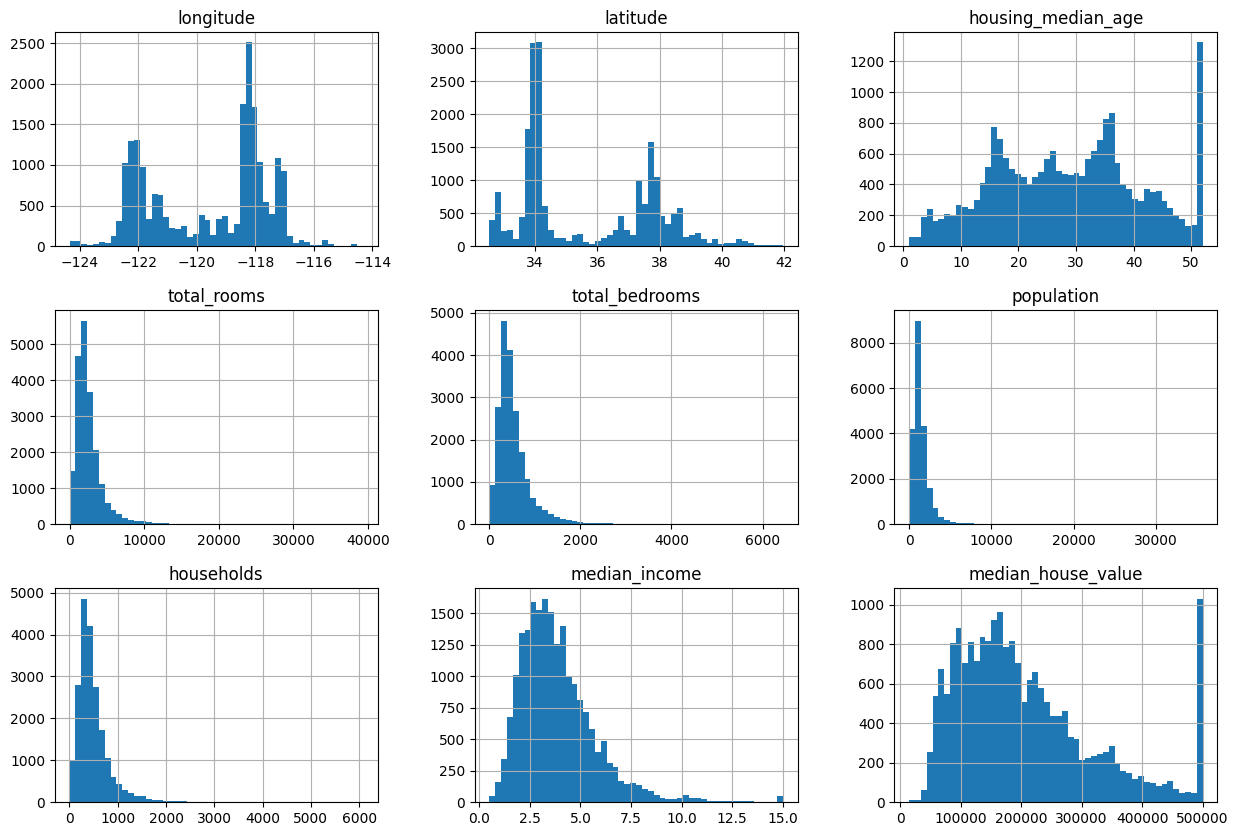

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
house_data.hist(bins=50,figsize=(15,10))
plt.show()

>most histograms above are *tail heavy*; extends in right of median than left. 

>To detect pattern more accurately, ML algo require bell-shaped distribution (also known as *Gaussian Distribution*)

**Data Snooping Bias :** when brain gets overfit by interesting pattern of test data, and we launch a system accoring to those patterns, then the systek does not work as expected

In [10]:
# creating a test set-train set spliting function
import numpy as np

def split_train_test(data,test_ratio): # creating a train test spliting function
    np.random.seed(42) # will generate same random indices everytime
    shuffled_indices = np.random.permutation(len(data)) # randomly shuffled indices of dataframe
    test_set_size = int(len(data) * test_ratio) # retriving test ratio from total data ; 0-1(0%-100%); 0.2 = 20%
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

> the above method works, but its not perfect. Over time, our algo'll see whole data because of its randomness.which isnt good
>
> Hence, we add seed(42), then it will generate same random number everytime; 42 = answer of the universe, life, everything

> This method will also get break with updated dataset; hence we'll use hashing comsistent test set. PAGE - 81(pdf)/55(book)
>
> however, we can do the same thing with sklearn's train_test_split function


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(house_data,test_size=0.2,random_state=42)

**Stratified Sampling :** Selection of random, but accurate representative sample of actual figure

eg- Indian Demography, a survey of 1000 people

**ACTUAL FIGURE :**      **STRATIFIED SAMPLE**
1. Hindu = 80%         :   (800 people) 
2. Mus = 18%           :   (180)
3. Sikh = 1.5% : (15)    
4. rest = 0.5%  : (5)    
 each homogenous group is called as _STRATA_

    

In [12]:
house_data["income_cat"] = pd.cut(house_data["median_income"], bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [13]:
house_data.head() # got new col income_cat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

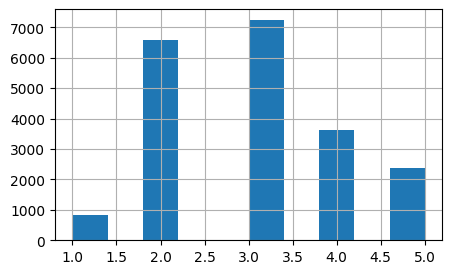

In [14]:
house_data.income_cat.hist(figsize=(5,3))

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit # stratified split

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(house_data,house_data.income_cat):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]

### PURE RANDOM VS STRATIFIED TEST SAMPLING :

In [16]:
train_set, test_set = train_test_split(house_data,test_size=0.2,random_state=42)

test_set["income_cat"].value_counts() / len(test_set) * 100 # percentage of each category in test set; RANDOM

income_cat
3    35.852713
2    32.437016
4    16.739341
5    10.949612
1     4.021318
Name: count, dtype: float64

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100 # percentage of each category in test set; STRATIFIED

income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

In [ ]:
house_data["income_cat"].value_counts() / len(house_data) * 100 # actual numbers for comparison

## **Visualization** : only explore training set

In [19]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

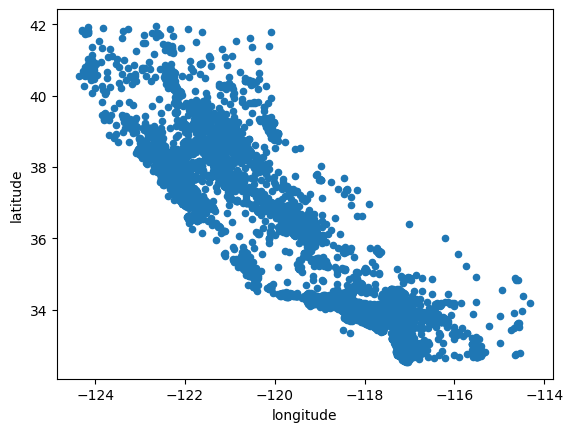

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

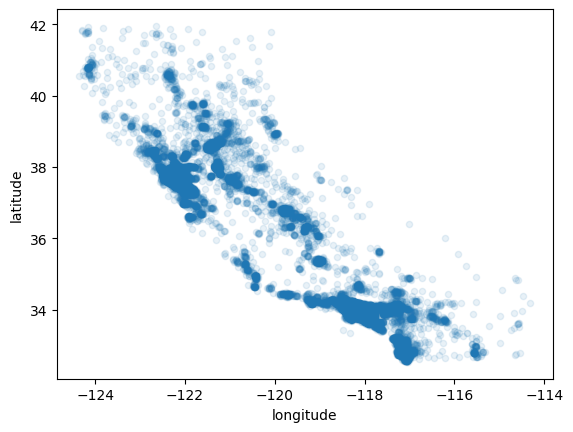

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

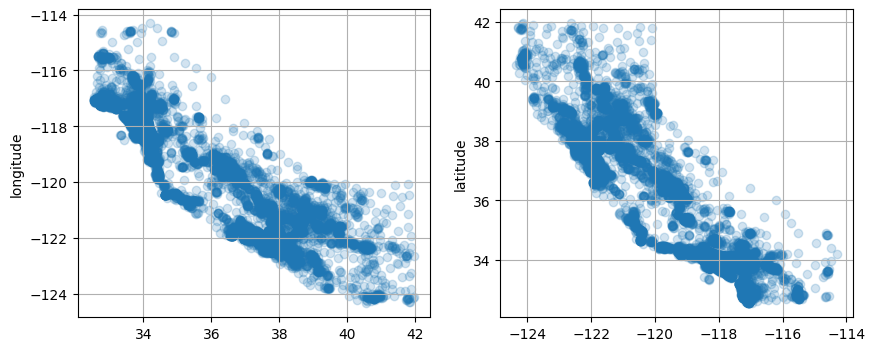

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # (no of row, no of column, index of plot)
plt.scatter(house_data["latitude"],house_data["longitude"],alpha=0.2)
plt.ylabel("longitude")
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(house_data["longitude"],house_data["latitude"],alpha=0.2)
plt.ylabel("latitude")
plt.grid(True)


## Always Keep x = Longitude and y = Latitude 

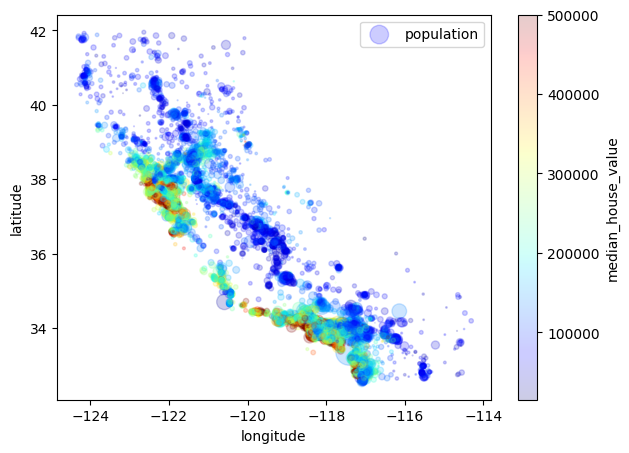

In [23]:
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.2,
            s = housing["population"]/100, label="population",figsize=(7,5),
            c = "median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

**alpha** = highlights higher density areas

**s** = circle radius size

**c** = color

**cmap** = color map (gradiant)

### Checking Correlation between attributes : using scatter matrix of pandas

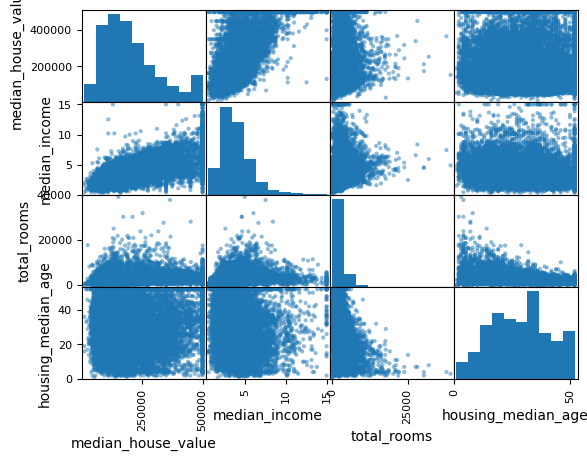

In [24]:
attr = ['median_house_value','median_income','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(housing[attr])
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

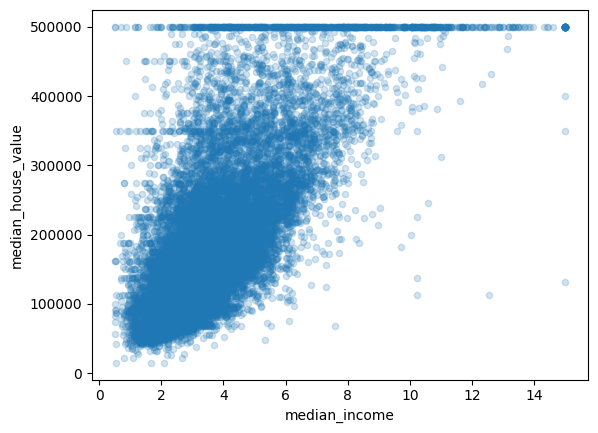

In [25]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2)

We can clearly see the correlation bw these two attributes of upward trends which his very strong. Also, we can notice a straight of cap on 500k

## Creating new useful attributes

In [26]:
housing["rooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [27]:
housing.drop('ocean_proximity',axis=1,inplace=True)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
income_cat                  0.642256
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
rooms_per_household        -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

**Insights**
> lower bedroom:room houses are expensive
> 
> rooms/household : larger the houses, more expensive they are. (obv)

### CLEANING THE DATA

In [28]:
housing = strat_train_set.drop("median_house_value",axis=1) # axis = 1 means whole column ; this is feature
housing_labels = strat_train_set["median_house_value"].copy() # this is label for same feature

**Filling NaN values :**

In [29]:
# using fillna function
median=housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [30]:
# using sklearn simple imputer: automactically fills NaN values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [31]:
# creating a copy of data without categorical column to find median
housing_num = housing.drop("ocean_proximity",axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
X = imputer.transform(housing_num) # gives a plain numPy array containing transformed features

In [34]:
house_trans = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [35]:
house_trans.head() # our final features for models

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [36]:
housing_cat = housing[["ocean_proximity"]] # single brackets gives plain values; double brackets give DataFramed values
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Most ML algorithms prefer to work with numbers, therefore, we have to convert these categorical values into numerical values

In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that, ML algo will assume that two nearby values are more similar than distant ones. Which is not True in this case. (infact 0 and 4[ocean and near ocean] are more similar); however this reprentasn is fine with values like - worst,avg,good,best

To fix this, we can create new binary attributes, one for each category and when the value is satisfying, attribute will be 1 otherwise 0 - **ONE HOT ENCODING**

These new attributes are sometimes called ***Dummy* attributes**

The output matrix of this encoding is full of zeroes with single 1 in each row

In [39]:
# scikit's one hot encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # gives scikit sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray() # gives numPy 2D array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## we can perform all data transformation steps in right order using pipeline class of sklearn

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    # ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

## To handle categorical and numerical columns together, we use:

In [42]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

# Selecting and training a Model

In [43]:
# trying on a few instances

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:",list(lin_reg.predict(some_data_prepared).astype('f')))

Predictions: [87710.92, 312666.78, 148193.92, 181973.84, 242269.47]


In [44]:
print("Labels",list(some_labels))

Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [45]:
# measuring RMSE on whole dataset
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68866.78550087014

In [46]:
# trying another powerful model to tackle underfitting
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [47]:
housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [48]:
housing_pred[:5], housing_labels.head()

(array([ 72100., 279600.,  82700., 112500., 238300.]),
 12655     72100.0
 15502    279600.0
 2908      82700.0
 14053    112500.0
 20496    238300.0
 Name: median_house_value, dtype: float64)

## Cross Validating The Model
we can evaluate the model using train_test_split() or sci-kit's *K-fold cross-validation* feature, like below:

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # we are putting minus sign becuase the scoring is negative mean square error

# IT IS BECAUSE SKLEARN'S CROSS VALDIATION METHOD EXPECT A UTILITY FUNCTION (GREATER IS BETTER) RATHER THAN A COST FUNCTION(LOWER IS BETTER)

In [50]:
# looking at results
def display_scores(scores):
    print("score: ",scores)
    print("mean: ",scores.mean())
    print("stndrd Deviation: ",scores.std())

display_scores(tree_rmse_scores) # The error is huge

score:  [71199.35288673 69244.24159094 63945.58589978 69559.00865511
 67800.91751525 69626.14338949 72796.88662743 69105.49574477
 65949.37106564 71807.73690565]
mean:  69103.47402807912
stndrd Deviation:  2531.726408853838


## DTM is overfitting the data so badly, now our last model is Random Forest Regressor 

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [53]:
housing_pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18473.913798943297

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)